# Contents:
#### Additional analysis to answer key questions
01. Importing libraries
02. Importing data
03. Defining simpler price ranges
04. Checking the frequency of departments
05. Examining the differences in ordering habits
    - Based on a customer’s loyalty status
    - Based on a customer’s region
    - Based on certain type of products

# Additional analysis to answer key questions

# 01. Importing libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 02. Importing data

In [3]:
# Defining the folder path
path = r'/Users/yusufsalk/Documents/Instacart Basket Analysis'

In [5]:
# Import the data
df = pd.read_pickle(os.path.join(path,'02 Data', 'Prepared Data', 'final_data.pkl'))

In [6]:
# Check the output
df.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,...,date_joined,n_dependants,fam_status,income,region,activity_flag,age_flag,department,income_flag,fam_depent_flag
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,2/17/2019,3,married,40423,South,High-activity customer,Adult,beverages,Low income,Married with dependents
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,2/17/2019,3,married,40423,South,High-activity customer,Adult,beverages,Low income,Married with dependents
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,2/17/2019,3,married,40423,South,High-activity customer,Adult,beverages,Low income,Married with dependents
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,2/17/2019,3,married,40423,South,High-activity customer,Adult,beverages,Low income,Married with dependents
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,2/17/2019,3,married,40423,South,High-activity customer,Adult,beverages,Low income,Married with dependents


In [8]:
df.shape

(32404859, 36)

# 03. Defining simpler price ranges

In [9]:
# Check the frequency
df['price_range_loc'].value_counts()

Mid-range product     21860860
Low-range prodcut     10126321
High-range product      417678
Name: price_range_loc, dtype: int64

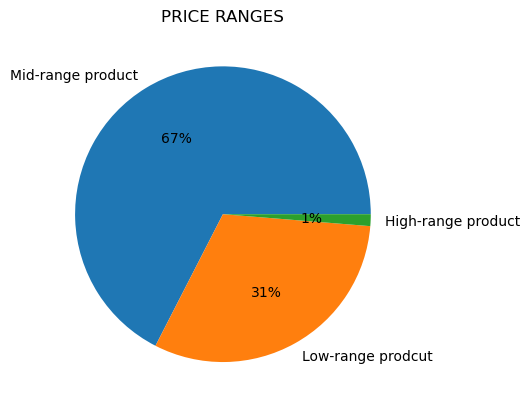

In [12]:
# Create a pie chart
price_range = df['price_range_loc'].value_counts().plot.pie(title = 'PRICE RANGES', label = '',autopct = ('%1.f%%'))

In [13]:
# Export the chart
price_range.figure.savefig(os.path.join(path,'04 Analysis', 'Visualizations', 'price_range.png'))

# 04. Checking the frequency of departments

In [14]:
# Check the frequency
df['department'].value_counts(dropna = False)

produce            9479291
dairy eggs         5398747
snacks             2887550
beverages          2688123
frozen             2234743
pantry             1875369
bakery             1172428
canned goods       1068058
deli               1051249
dry goods pasta     866627
household           738666
meat seafood        708927
breakfast           703033
personal care       447572
babies              423802
international       269253
alcohol             153696
pets                 97716
missing              69145
other                36291
bulk                 34573
Name: department, dtype: int64

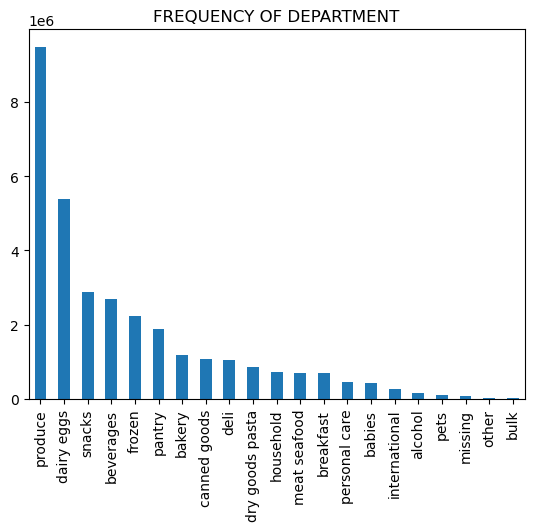

In [16]:
# Creating a bar chart
department_frequency = df['department'].value_counts(dropna = False).plot.bar()
plt.title('FREQUENCY OF DEPARTMENT')
plt.show()

In [17]:
# Export the chart
department_frequency.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'department_frequency.png'))

# 05. Examining the differences in ordering habits

## Based on a customer’s loyalty status

In [27]:
# Creating a crosstab between department and loyalty_flag
department_loyalty = pd.crosstab(df['department'], df['loyalty_flag'], normalize = 'index', dropna = False)

In [28]:
# Check the output
department_loyalty

loyalty_flag,Loyal customer,New customer,Regular customer
department,,,
alcohol,0.251945,0.245276,0.502778
babies,0.394307,0.141854,0.463839
bakery,0.324005,0.190804,0.485191
beverages,0.318072,0.190791,0.491136
breakfast,0.315173,0.196807,0.488020
bulk,0.400139,0.152460,0.447401
canned goods,0.275822,0.221130,0.503048
dairy eggs,0.339098,0.179972,0.480930
deli,0.308249,0.195720,0.496032


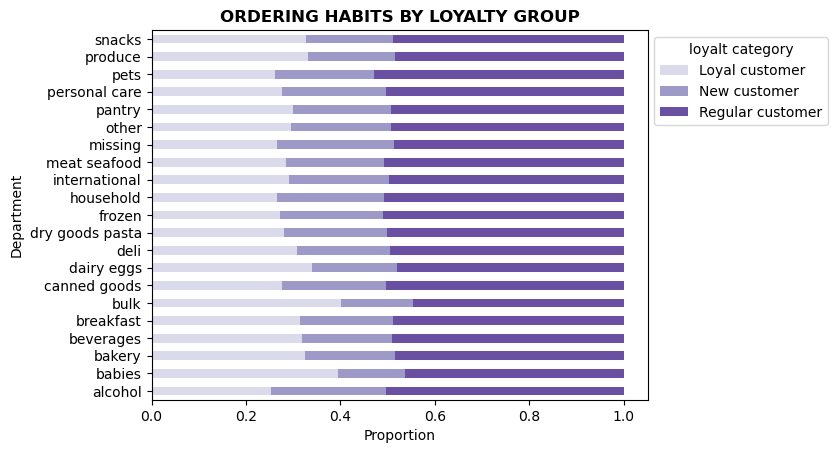

In [29]:
# Creating a stacked bar chart
department_loyalty_bar = department_loyalty.plot.barh(stacked = True, color = sns.color_palette('Purples', 3))
plt.title('ORDERING HABITS BY LOYALTY GROUP', fontweight = 'bold')
plt.xlabel('Proportion')
plt.ylabel('Department')
plt.legend(title ='loyalt category', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

In [30]:
# Export the chart
department_loyalty_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'department_loyalty.png'))

## Based on a customer’s region

In [31]:
# Creating a crosstab between department and region
department_region = pd.crosstab(df['department'], df['region'], normalize = 'index', dropna = False)

In [32]:
# Check the output
department_region

region,Midwest,Northeast,South,West
department,,,,
alcohol,0.235439,0.172692,0.335884,0.255986
babies,0.233560,0.177297,0.338965,0.250178
bakery,0.233591,0.177921,0.331632,0.256856
beverages,0.232718,0.179835,0.334412,0.253036
breakfast,0.232636,0.175773,0.333201,0.258390
bulk,0.236977,0.167819,0.333584,0.261620
canned goods,0.234727,0.174855,0.333329,0.257089
dairy eggs,0.234170,0.176712,0.332849,0.256269
deli,0.233701,0.177710,0.332385,0.256205


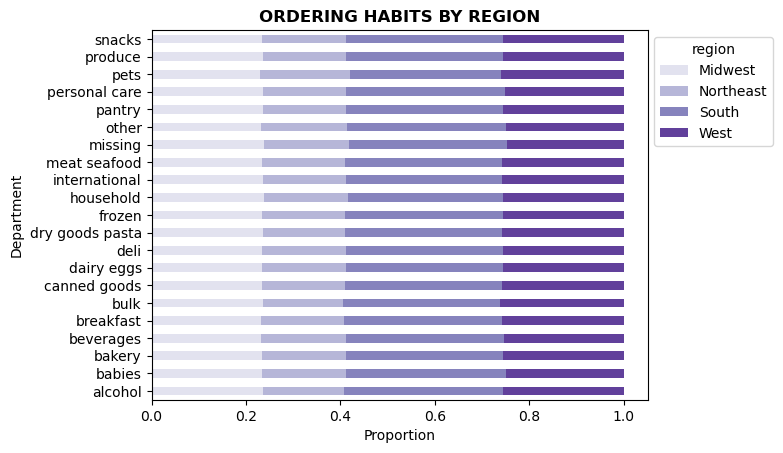

In [33]:
# Creating a stacked bar chart
department_region_bar = department_region.plot.barh(stacked = True, color = sns.color_palette('Purples', 4))
plt.title('ORDERING HABITS BY REGION', fontweight = 'bold')
plt.xlabel('Proportion')
plt.ylabel('Department')
plt.legend(title ='region', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

In [34]:
# Export the chart
department_region_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'department_region.png'))

## Based on certain type of products

In [61]:
# Creating a flag for certain type of products
df.loc[df['department_id'] == 18, 'consumer_type'] = 'Parents'
df.loc[df['department_id'] == 8, 'consumer_type'] = 'Pet owners'
df.loc[df['department_id'] == 5, 'consumer_type'] = 'Alcohol consumers'
df.loc[~df['department_id'].isin([5, 8, 18]), 'consumer_type'] = 'Other products'

In [65]:
# Check the frequency
df['consumer_type'].value_counts(dropna = False)

Other products       31729645
Parents                423802
Alcohol consumers      153696
Pet owners              97716
Name: consumer_type, dtype: int64

In [66]:
df['consumer_type'].value_counts(dropna = False, normalize = True)

Other products       0.979163
Parents              0.013078
Alcohol consumers    0.004743
Pet owners           0.003015
Name: consumer_type, dtype: float64

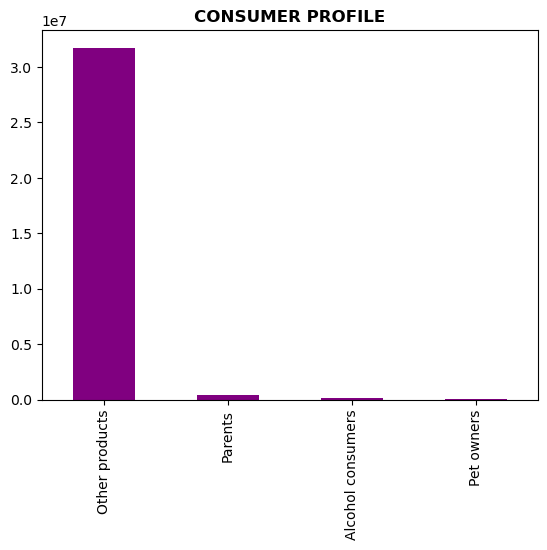

In [67]:
# Creating a bar chart
consumer_type_bar = df['consumer_type'].value_counts().plot.bar(color = 'Purple')
plt.title('CONSUMER PROFILE', fontweight = 'bold')
plt.show()

In [68]:
# Export the chart
consumer_type_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'consumer_type.png'))